In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

from src.processing.constants import *
from src.processing.utils import list_files
from src.processing.txt_loading import txt_to_list
from src.processing.radial import radial_select, order_coords, create_radius_select_stack, find_period_radial_select
from src.processing.constants import BUCKLING_PATH, EDGE_TRACKING_PATH
from src.processing.autocorrelation import autocorrelate_single_value, autocorrelate_radial_ring, find_period_autocorrelation_fft
import pandas as pd

## 1. Setup

In [42]:
slice = 200

In [47]:
image = imread(str(BUCKLING_PATH / "200920_biolight_nobg_nooutliers_despeckle_enhance.tif"))

In [48]:
image = image[slice]

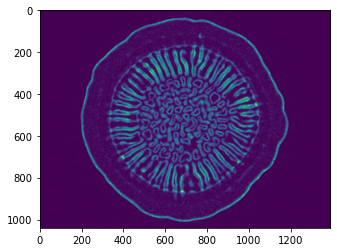

In [49]:
plt.imshow(image)

## 2. Analysis

In [50]:
height, width = np.shape(image)
height, width

(1040, 1388)

In [51]:
timestamps_b, radii_b, x_center_b, y_center_b = txt_to_list(str(EDGE_TRACKING_PATH/'200920_biolight_fitted_circle_position_data.txt'))
x_center, y_center = x_center_b[slice], y_center_b[slice]
center_fitted = (x_center, y_center)
coffee_ring_radius = radii_b[0]
coffee_ring_radius

213.617163424972

In [56]:
stack = create_radius_select_stack(image, center_fitted, 300, 0.5)
data = stack[2]
len(data)

1902

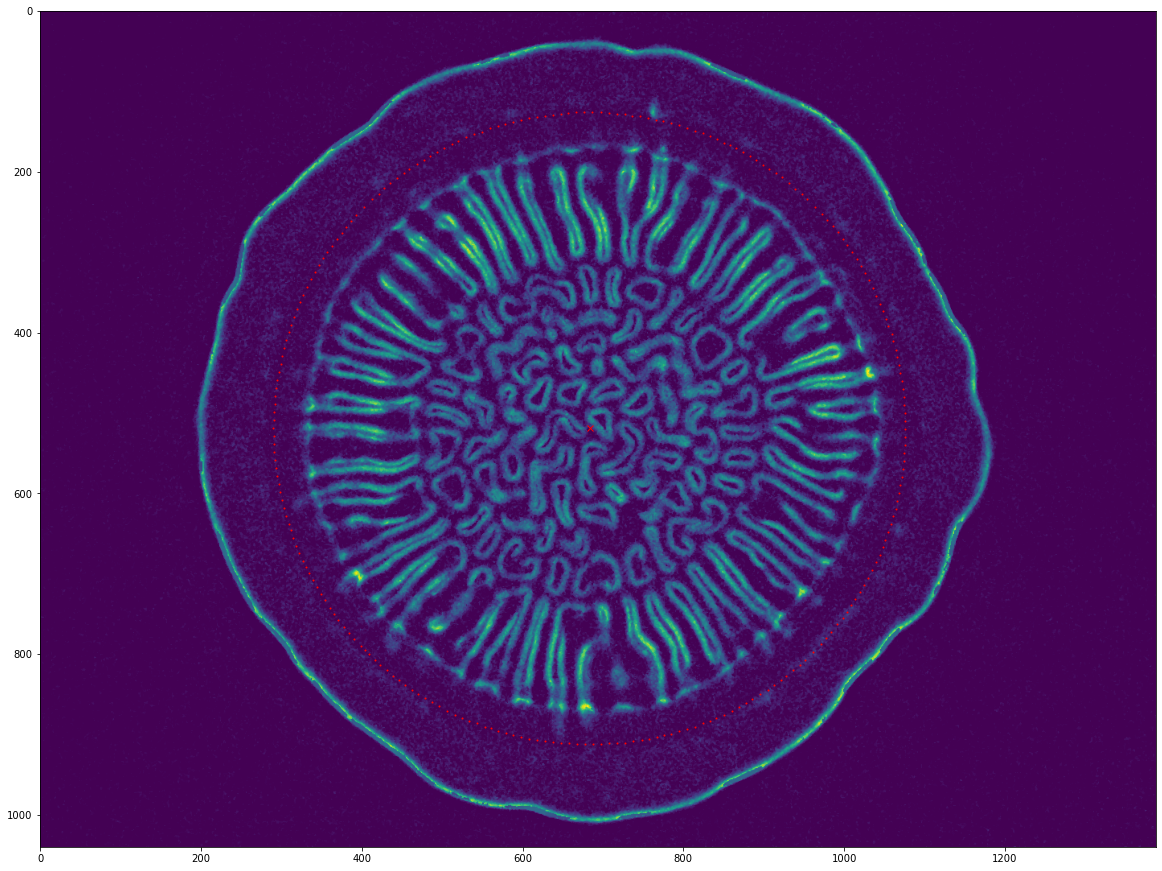

In [62]:
fig, ax = plt.subplots(1,1, figsize=(20, 20))
ax.imshow(image)
ax.plot(x_center, y_center, 'xr')
ax.plot(stack[0][::10], stack[1][::10], 'ro', ms = 1)
ax.set_aspect('equal')
plt.show()

In [12]:
from scipy.signal import find_peaks

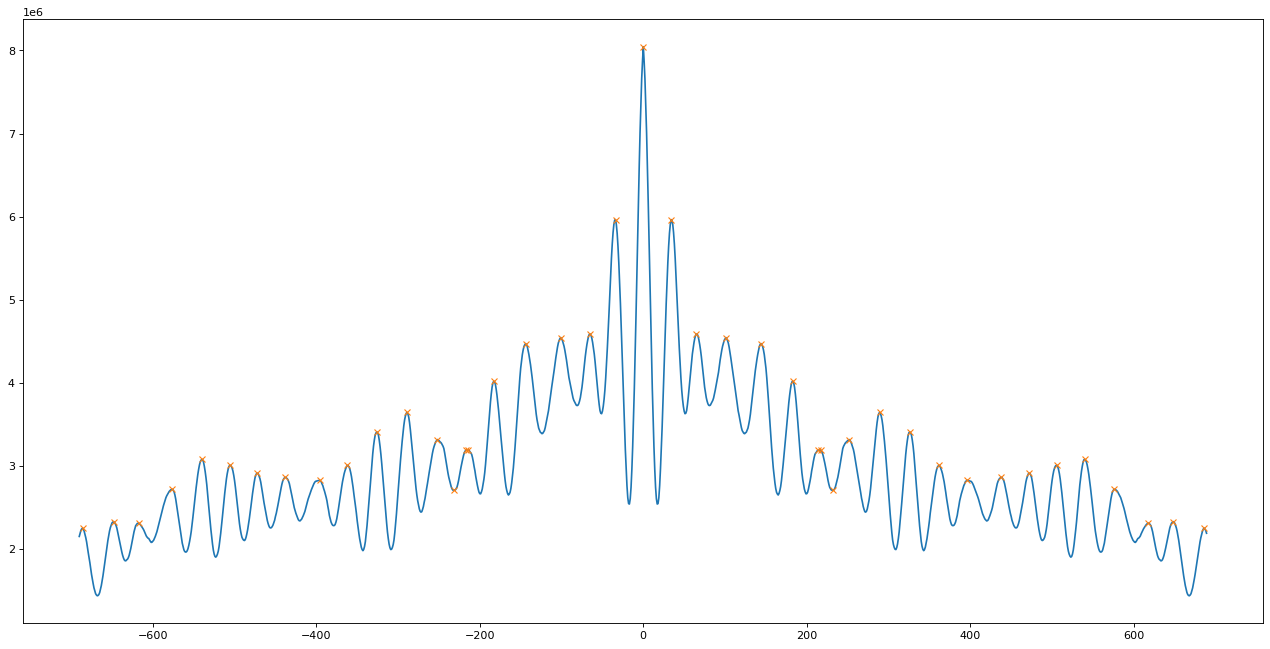

8.869565217391305

In [13]:
def find_period_radial_select(stack, plot=False):
    data = stack[2]
    auto_correlation = np.correlate(data, data, mode='same')
    lags = np.arange(-len(auto_correlation)/2, len(auto_correlation)/2)

    peaks, _ = find_peaks(auto_correlation, height=0)
    second_maximum = np.sort(auto_correlation[peaks])[-2]
    index = np.where(auto_correlation == second_maximum)[0]
    period = (lags[index[1]]/len(data))*360

    if plot == True:
        plt.figure(figsize=(20, 10), dpi=80)
        plt.plot(lags, auto_correlation)
        plt.plot(lags[peaks], auto_correlation[peaks], "x")
        plt.show()
    return period

find_period_radial_select(stack, True)

In [58]:
lags, autocorrelation = autocorrelate_radial_ring(data)

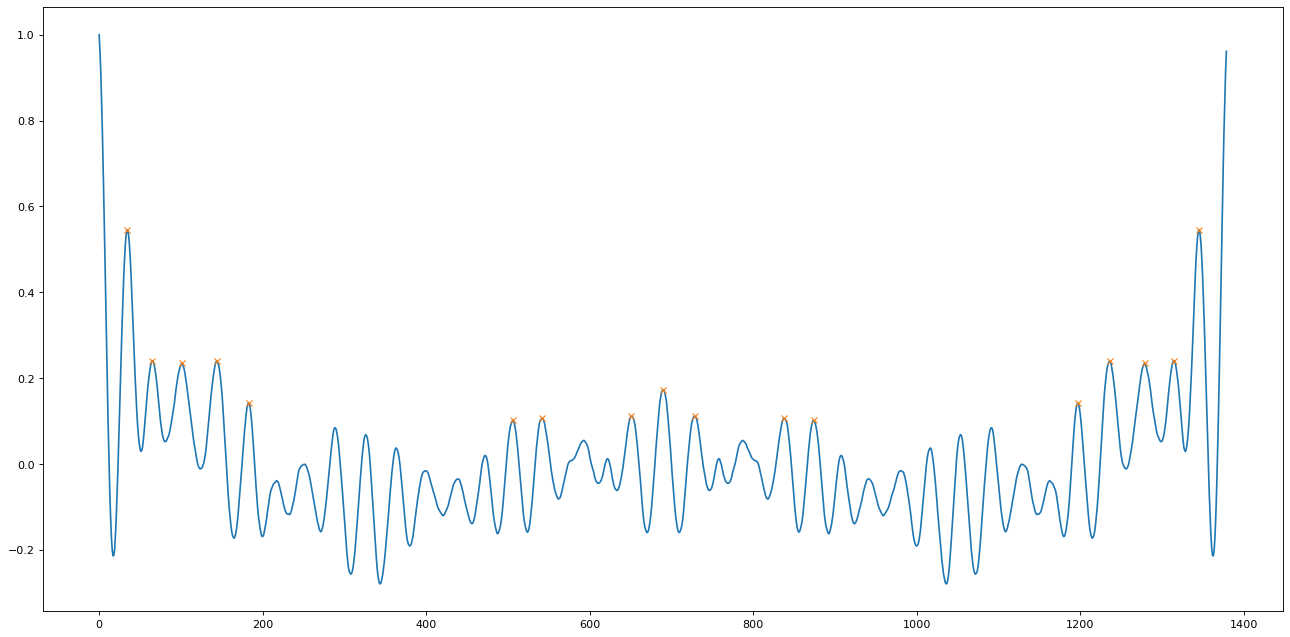

1380

In [15]:
peaks, _ = find_peaks(autocorrelation, height=0.1)

plt.figure(figsize=(20, 10), dpi=80)
plt.plot(lags, autocorrelation)
plt.plot(lags[peaks], autocorrelation[peaks], "x")
plt.show()
len(autocorrelation)


In [16]:
from scipy.ndimage import gaussian_filter

no peaks =  2


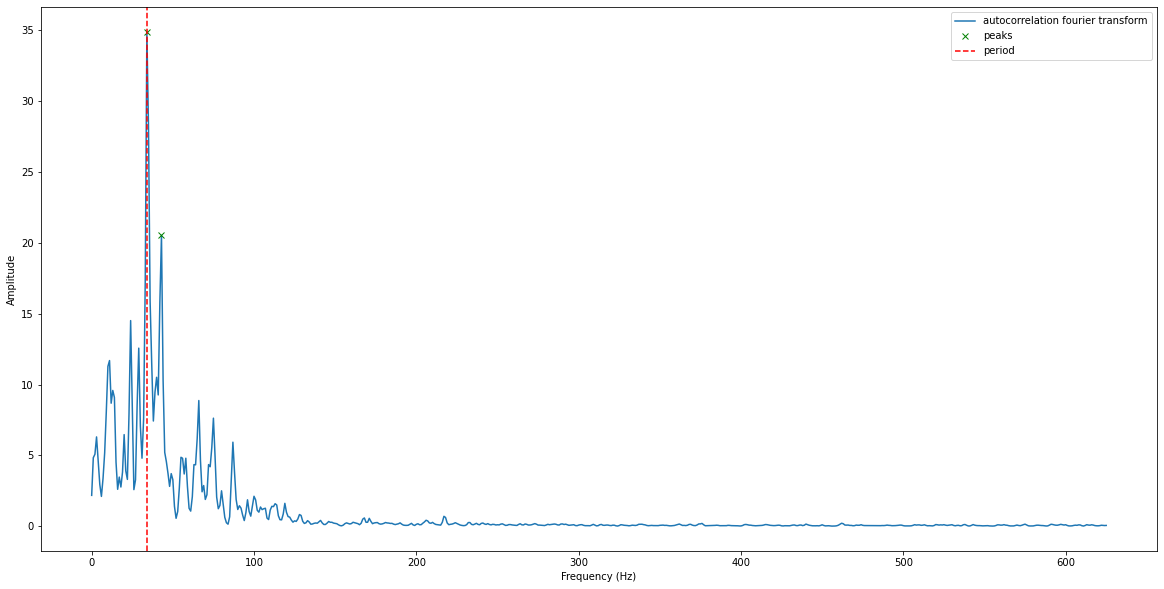

period = 34.0 pixels, 9.776357827476039 degrees
(1,)


In [60]:
stack = create_radius_select_stack(image, center_fitted,  200, 0.5)
data = stack[2]
lags, autocorrelation = autocorrelate_radial_ring(data)
a, b = find_period_autocorrelation_fft(autocorrelation, 0.8, True)

no peaks =  3
period = 38.0 pixels, 10.193740685543965 degrees
(1,)
no peaks =  1
period = 45.99999999999999 pixels, 11.862464183381087 degrees
(1,)
no peaks =  3
period = 47.0 pixels, 11.660923501033771 degrees
(1,)
no peaks =  2
period = 46.0 pixels, 10.988719309887193 degrees
(1,)
no peaks =  4
period = 49.0 pixels, 11.214240305149396 degrees
(1,)
no peaks =  1
period = 49.0 pixels, 10.677966101694915 degrees
(1,)
no peaks =  1
period = 50.0 pixels, 10.392609699769054 degrees
(1,)
no peaks =  1
period = 50.0 pixels, 10.011123470522802 degrees
(1,)
no peaks =  1
period = 49.99999999999999 pixels, 9.777294948397609 degrees
(1,)
no peaks =  1
period = 49.99999999999999 pixels, 9.493670886075948 degrees
(1,)
no peaks =  4
period = 51.0 pixels, 9.434737923946557 degrees
(1,)
no peaks =  2
period = 50.0 pixels, 8.937437934458789 degrees
(1,)
no peaks =  4
period = 52.0 pixels, 8.96551724137931 degrees
(1,)
no peaks =  2
period = 50.0 pixels, 8.287292817679559 degrees
(1,)
no peaks =  2
pe

Text(0, 0.5, 'Period (degrees)')

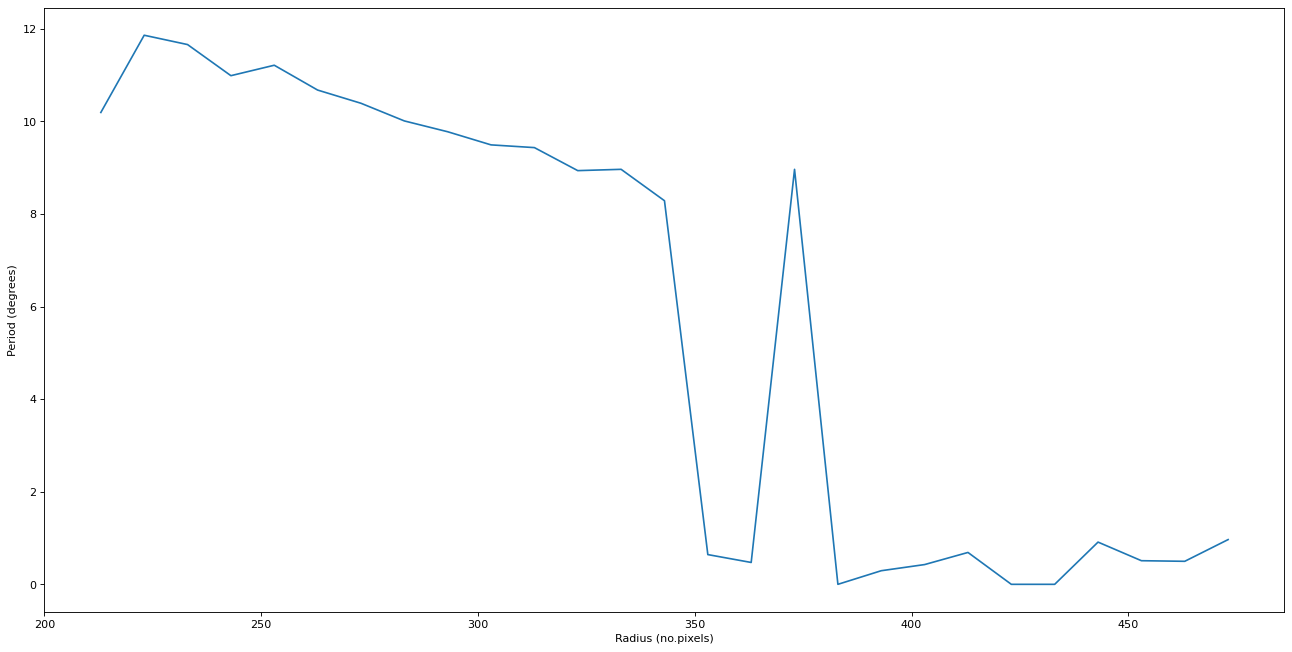

In [64]:
period  = []
radii = []
for r in range(int(coffee_ring_radius),int(radii_b[slice]),10):
    radii.append(r)
    stack = create_radius_select_stack(image, center_fitted,  r, 0.5)
    data = stack[2]
    lags, autocorrelation = autocorrelate_radial_ring(data)
    period_pixels, period_deg = find_period_autocorrelation_fft(autocorrelation, 0.8)
    period.append(period_deg)

plt.figure(figsize=(20, 10), dpi=80)
plt.plot(radii, period)
plt.xlabel('Radius (no.pixels)')
plt.ylabel('Period (degrees)')

Find number of wrinkles

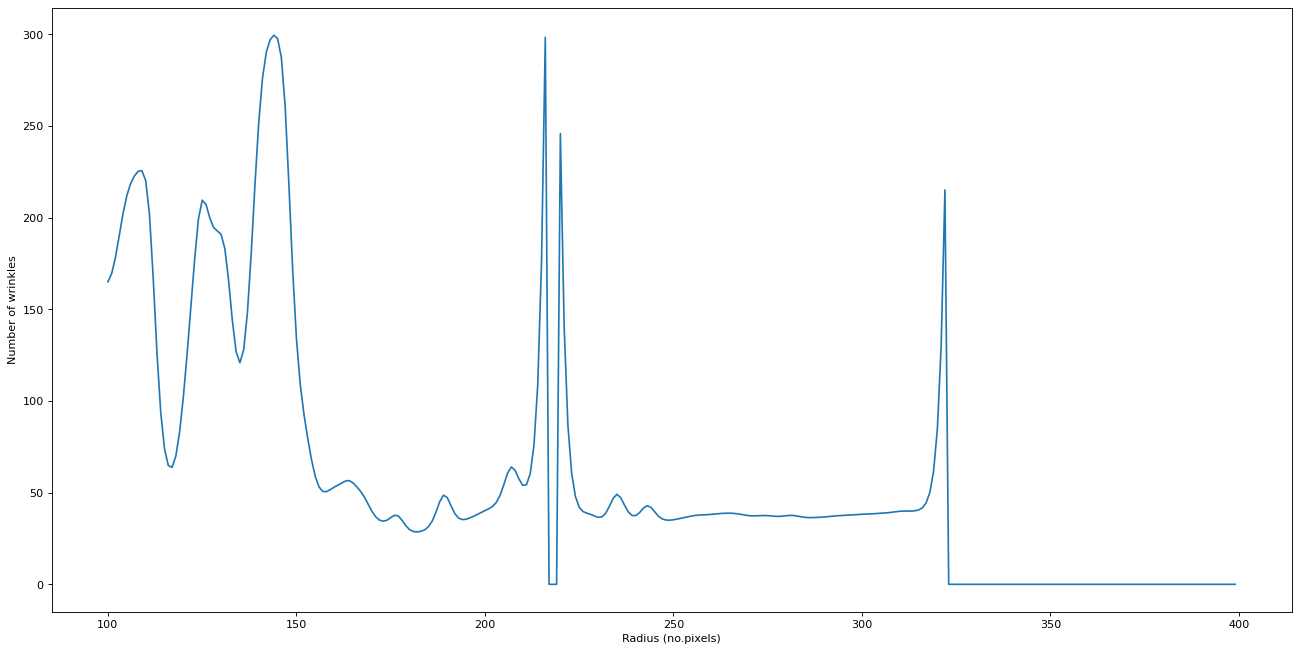

In [32]:
period_smooth = gaussian_filter(period, 2)
period_clipped = np.array(period_smooth)
no_wrinkles = 360/(period_clipped)
no_wrinkles[no_wrinkles > 360] = 0
plt.figure(figsize=(20, 10), dpi=80)
plt.plot(radii, no_wrinkles)
plt.xlabel('Radius (no.pixels)')
plt.ylabel('Number of wrinkles')
plt.show()

Text(0, 0.5, 'Period amoothed (degrees)')

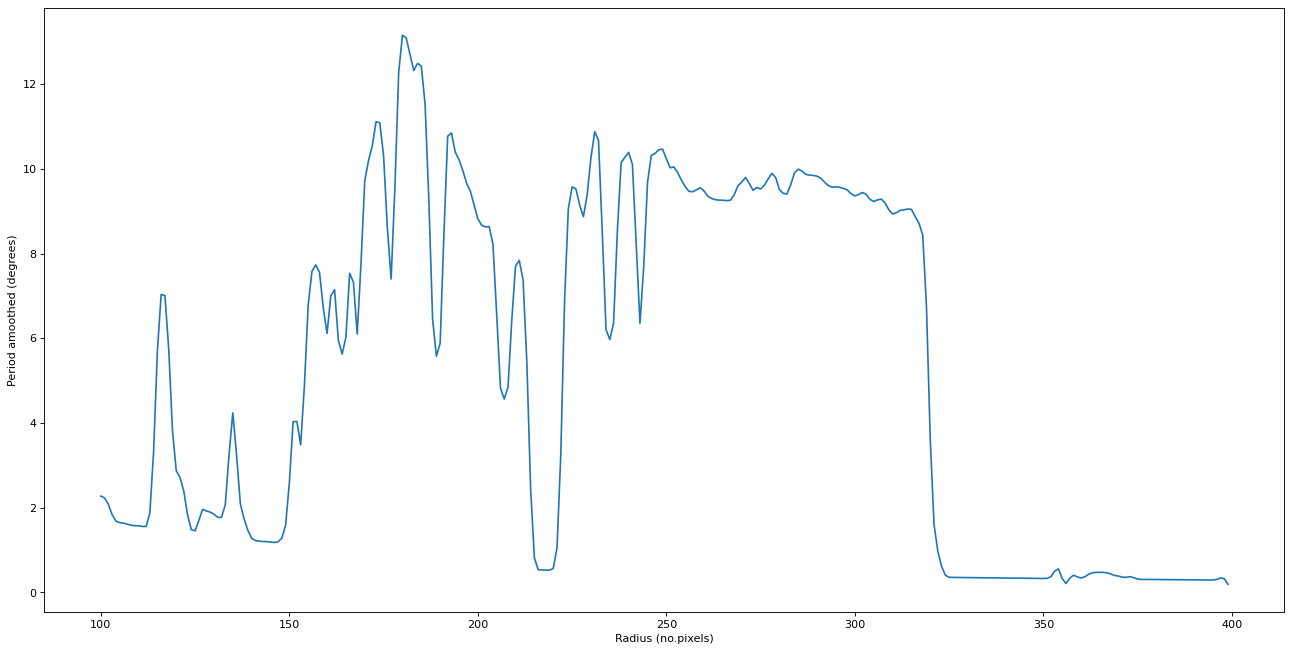

In [172]:
#print(np.shape(np.array(period).flatten()))

period_smooth = gaussian_filter(period, 1)

plt.figure(figsize=(20, 10), dpi=80)
plt.plot(radii, period_smooth)
plt.xlabel('Radius (no.pixels)')
plt.ylabel('Period amoothed (degrees)')

36.5


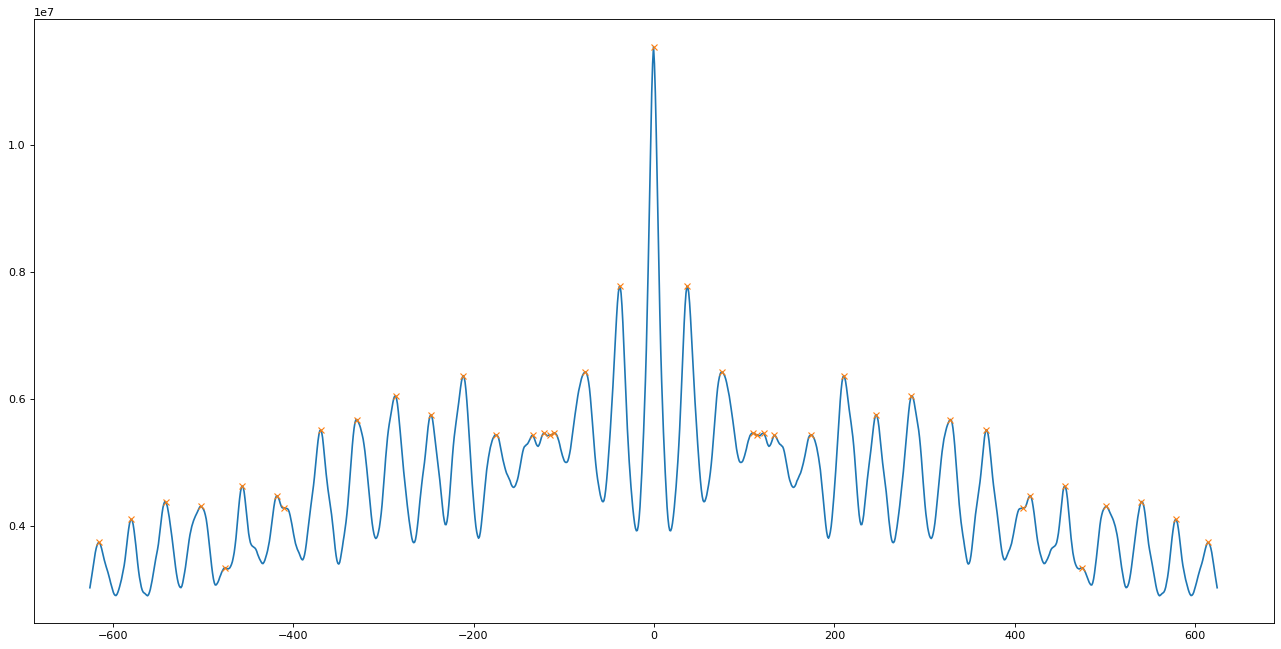

In [ ]:
plt.figure(figsize=(20, 10), dpi=80)
peaks, _ = find_peaks(auto_correlation, height=0)
plt.plot(lags, auto_correlation)
plt.plot(lags[peaks], auto_correlation[peaks], "x")
second_maximum = np.sort(auto_correlation[peaks])[-2]
index = np.where(auto_correlation == second_maximum)[0]
period = lags[index[1]]
print(period)
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

The Autocorreleation plot for the data is:


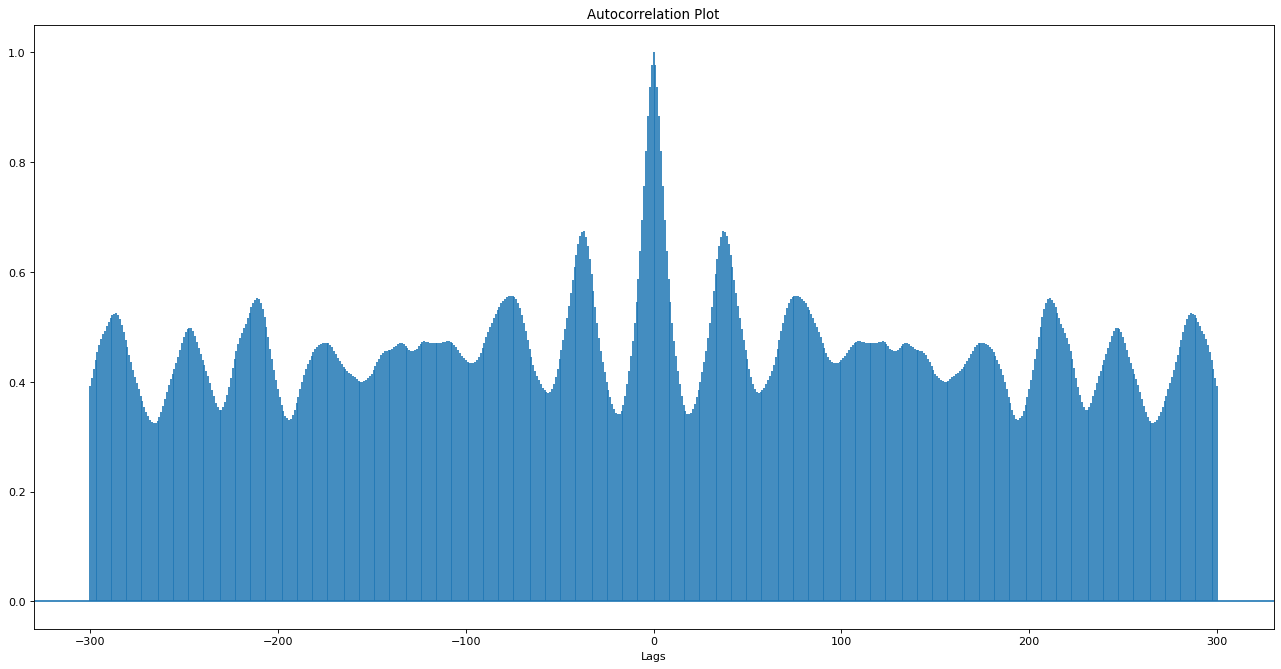

In [ ]:
plt.figure(figsize=(20, 10), dpi=80)
plt.title("Autocorrelation Plot")
plt.xlabel("Lags")
 
# Plotting the Autocorreleation plot.
plt.acorr(data, maxlags = 300)
 
# Displaying the plot.
print("The Autocorreleation plot for the data is:")
#plt.grid(True)
 
plt.show()

In [ ]:
print(len(data))
panda_data = pd.Series(data)
print(len(panda_data))
panda_data.autocorr(750)

762
762


0.8627801959061309

In [ ]:
auto_data = pd.Series([panda_data.autocorr(i) for i in range(0,data.shape[0]-1)], index=range(0,data.shape[0]-1))

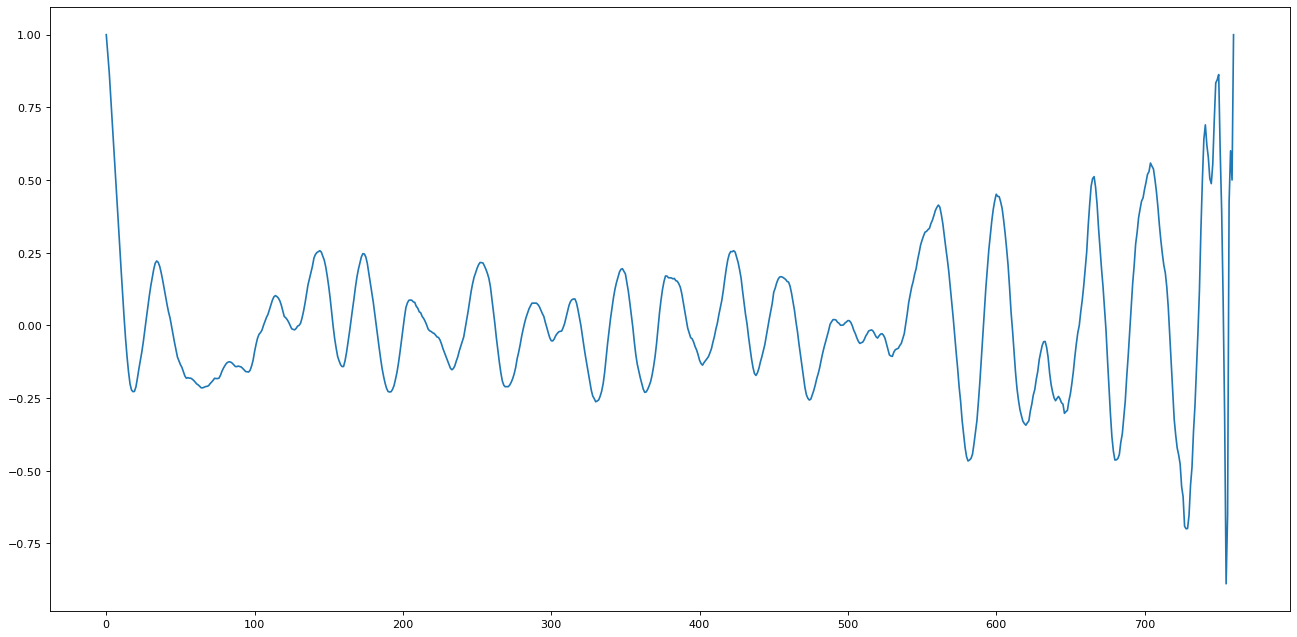

In [ ]:
plt.figure(figsize=(20, 10), dpi=80)
plt.plot(auto_data)